<p>
    <img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="float:left;width:65px">
    <h1 style="float:left;color:#1A5276;padding-left:15px;font-size:20px;">AWS IoT Analytics | Notebook</h1>
</p>


When loading data from IoT Analytics datasets, the client should be initialized first:

In [91]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt

# create IoT Analytics client
client = boto3.client('iotanalytics')

Now we can get the data location (URL) for the given dataset and start working with the data (In order to need to perform get_dataset_content, you need to grant iot analytics corresponding IAM permission):

In [92]:
dataset = "emissions_dataset"
dataset_url = client.get_dataset_content(datasetName = dataset)['entries'][0]['dataURI']

df = pd.read_csv(dataset_url)
df.head()

# start working with the data

,message,__dt
0,{} most recent reading from v4 : 2624.72,2023-03-31 00:00:00.000
1,{} most recent reading from v2 : 2624.72,2023-03-31 00:00:00.000
2,{} most recent reading from v0 : 0.0,2023-03-31 00:00:00.000
3,{} most recent reading from v3 : 2920.66,2023-03-31 00:00:00.000
4,{} most recent reading from v0 : 0.0,2023-03-31 00:00:00.000


In [93]:
df.shape

(973, 2)

In [94]:
df = df[df['message'].apply(lambda x: 'v' in x)]
df.head()

,message,__dt
0,{} most recent reading from v4 : 2624.72,2023-03-31 00:00:00.000
1,{} most recent reading from v2 : 2624.72,2023-03-31 00:00:00.000
2,{} most recent reading from v0 : 0.0,2023-03-31 00:00:00.000
3,{} most recent reading from v3 : 2920.66,2023-03-31 00:00:00.000
4,{} most recent reading from v0 : 0.0,2023-03-31 00:00:00.000


In [95]:
df['vehicle'] = df['message'].apply(lambda x: x.split(' : ')[0][-2:])
df['emission'] = df['message'].apply(lambda x: x.split(': ')[1])
df['emission'] = df['emission'].astype(float)
df['__dt'] = pd.to_datetime(df['__dt'])
df = df.drop(columns=['message']).reset_index(drop=True)
df.head()

,__dt,vehicle,emission
0,2023-03-31,v4,2624.72
1,2023-03-31,v2,2624.72
2,2023-03-31,v0,0.00
3,2023-03-31,v3,2920.66
4,2023-03-31,v0,0.00


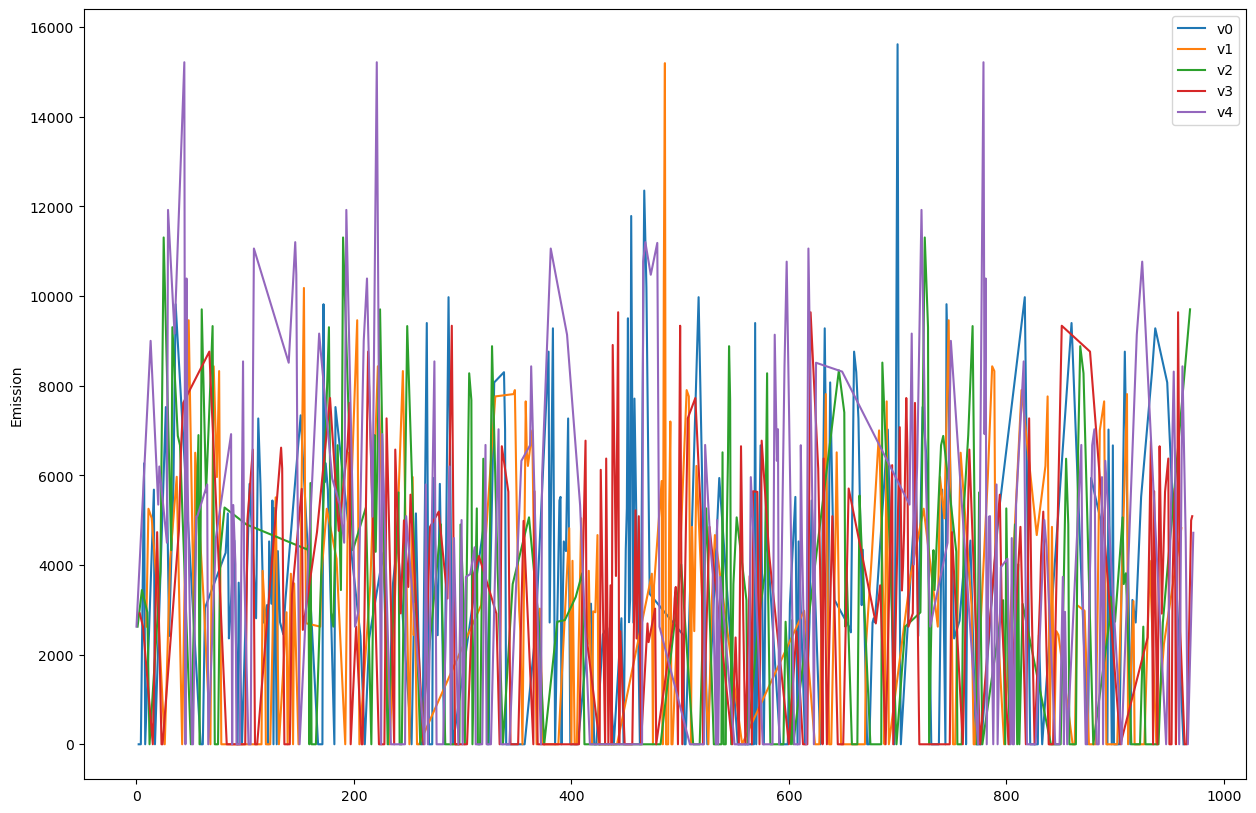

In [131]:
plt.figure(figsize=(15, 10))
df.groupby('vehicle')['emission'].plot(legend=True, ylabel='Emission');
plt.savefig('vehicle-emissions.jpg')

/tmp/ipykernel_7527/961409583.py:5: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['__dt', 'vehicle'], dtype='object')
  dfvr = dfv.rolling(10).mean().iloc[10:]


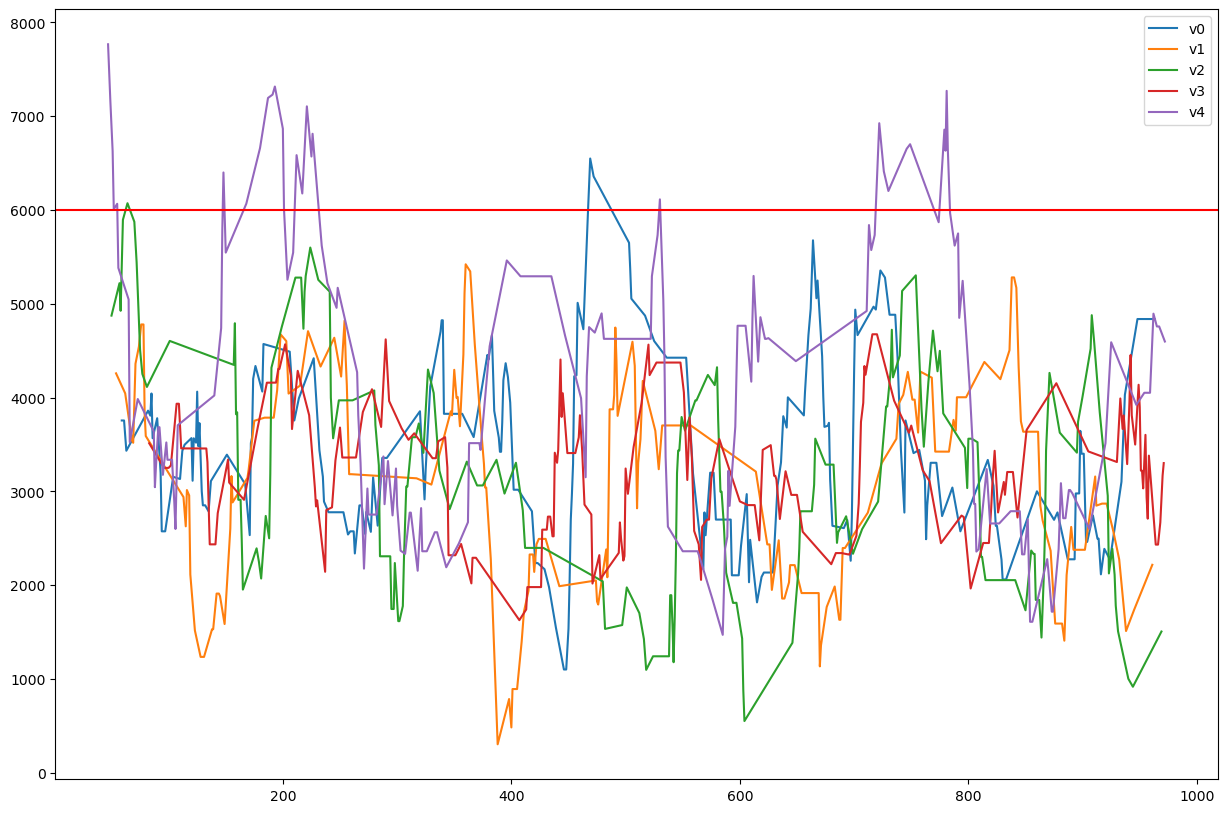

In [132]:
fig, ax = plt.subplots(figsize=(15, 10))

for i in range(5):
    dfv = df.copy(deep=True)[df.vehicle == f'v{i}']
    dfvr = dfv.rolling(10).mean().iloc[10:]
    dfvr.plot(ax=ax);
plt.axhline(y=6000, color='r', linestyle='-')
ax.legend([f'v{i}' for i in range(5)])
plt.savefig('vehicle-emissions-sliding-window.jpg')

<div style="height:60px;"><div style="height:7px;background-color:#20B3CD;width:100%;margin-top:20px;position:relative;"><img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="height:50px;width:50px;margin-top:-20px;position:absolute;margin-left:42%;"></div></div>